In [0]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from google.colab import files
from sklearn.linear_model import LogisticRegression
#Please comment out this line of code if unnecessary
#uploaded = files.upload()

In [1071]:
Data = pd.read_csv("bank-full.csv")
Data.head(10) #several missing values!

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Univariate analysis:
a.) Univariate analysis-data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b.) Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c.) Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [1072]:
Data.shape

(45211, 17)

In [1073]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1074]:
Data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


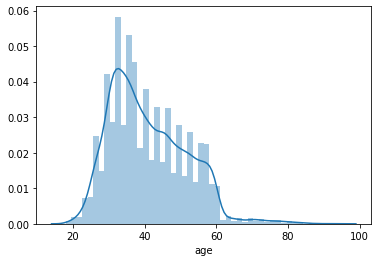

In [1075]:
sns.distplot(Data['age'])

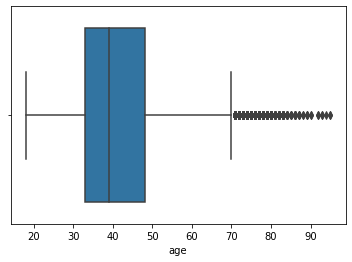

In [1076]:
sns.boxplot(Data.age)

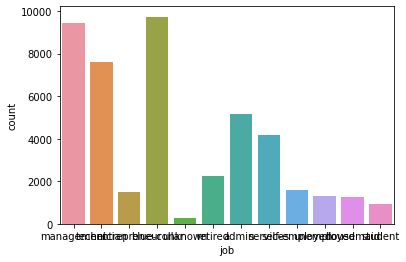

In [1077]:
sns.countplot(Data['job'])

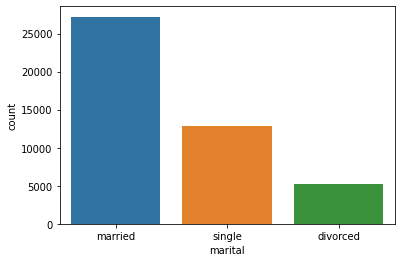

In [1078]:
sns.countplot(Data['marital'])

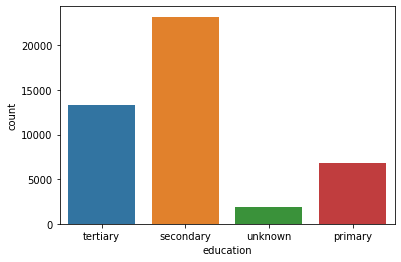

In [1079]:
sns.countplot(Data['education'])

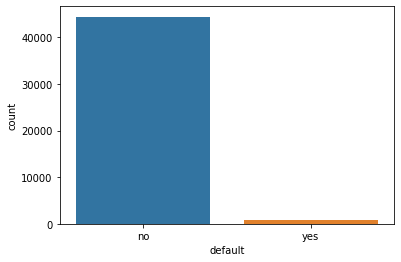

In [1080]:
sns.countplot(Data['default'])

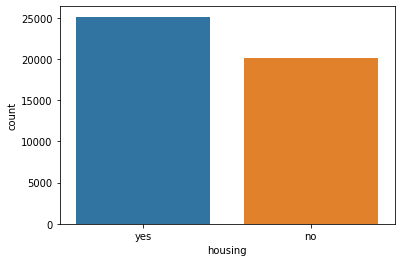

In [1081]:
sns.countplot(Data['housing'])

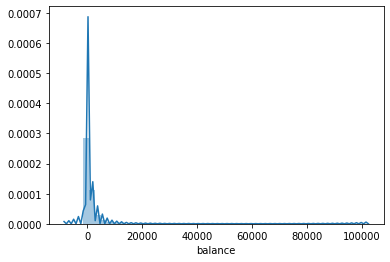

In [1082]:
sns.distplot(Data['balance'])

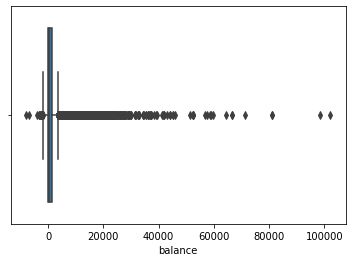

In [1083]:
sns.boxplot(Data.balance)

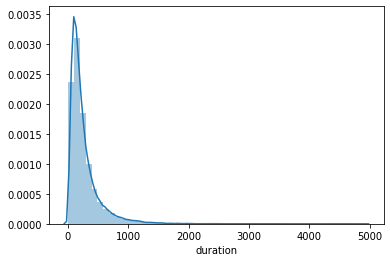

In [1084]:
sns.distplot(Data['duration'])

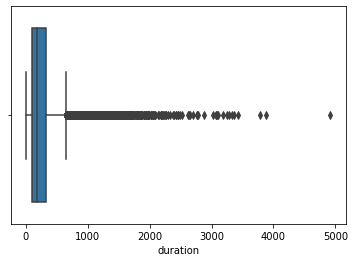

In [1085]:
sns.boxplot(Data.duration)

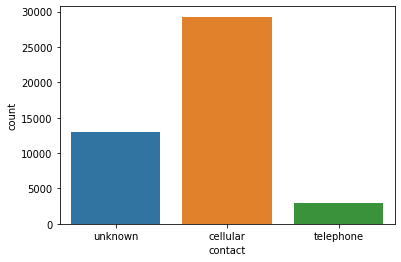

In [1086]:
sns.countplot(Data['contact'])

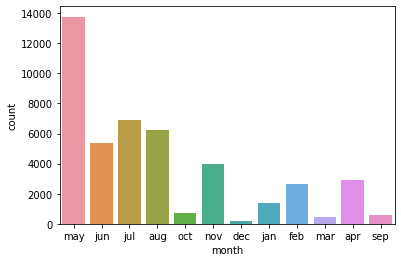

In [1087]:
sns.countplot(Data.month)

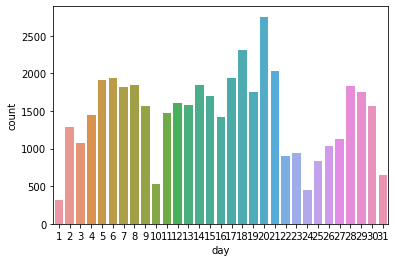

In [1088]:
sns.countplot(Data.day)

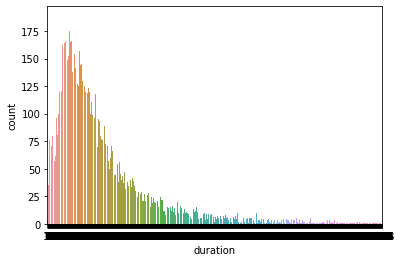

In [1089]:
sns.countplot(Data.duration)

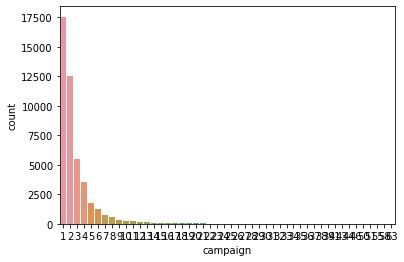

In [1090]:
sns.countplot(Data.campaign)

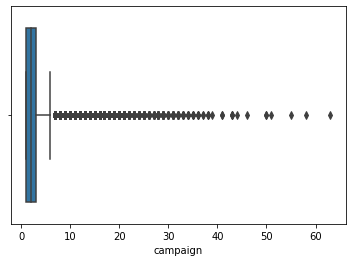

In [1091]:
sns.boxplot(Data.campaign)

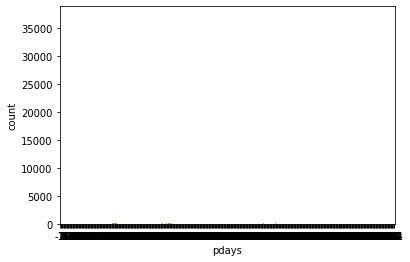

In [1092]:
sns.countplot(Data.pdays)

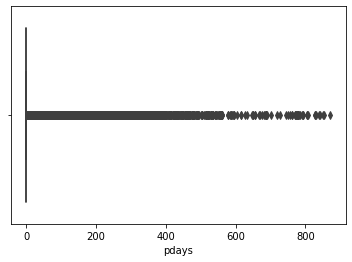

In [1093]:
sns.boxplot(Data.pdays)

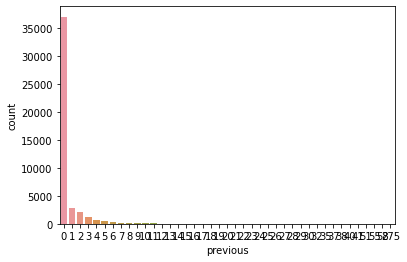

In [1094]:
sns.countplot(Data.previous)

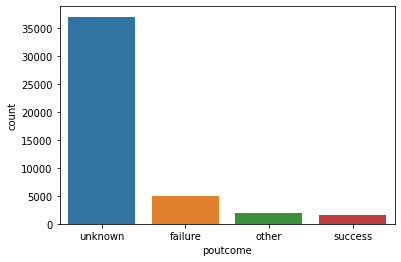

In [1095]:
sns.countplot(Data.poutcome)

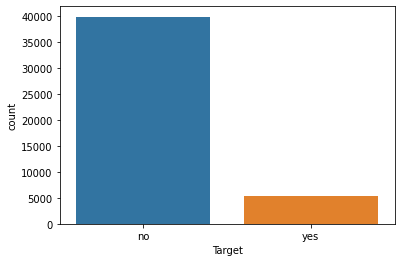

In [1096]:
sns.countplot(Data.Target)

In [1097]:
Data.isnull().values.any() 

False

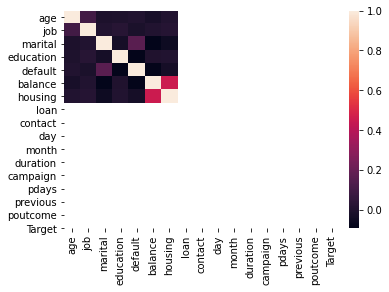

In [1098]:
sns.heatmap(Data.corr(), xticklabels = Data.columns.values, yticklabels = Data.columns.values)

Deliverable –2 (Prepare the data for analytics)–(10)
1.Ensure the attribute types are correct. If not, take appropriate actions.
2.Get the data model ready. 
3.Transform the data i.e. scale / normalize if required4.Create the training set and test set in ratioof 70:30

In [1099]:
for feature in Data.columns: # Loop through all columns in the dataframe
    if Data[feature].dtype == 'object': # Only apply for columns with categorical strings
        Data[feature] = pd.Categorical(Data[feature])# Replace strings with an integer
Data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [0]:
replaceStruct = {"job": {"management": 1, "technician":2 , "entrepreneur": 3, "blue-collar": 4,"retired": 5, "admin.": 6, "student" :7, "housemaid": 8, "services" : 9, "self-employed" :10, "unemployed" : 11, "unknown": -1}, "marital" : {"single" : 1, "married" : 2, "divorced" : 3}, "education" : {"primary": 1, "secondary" : 2, "tertiary": 3, "unknown": -1}, "default" : {"yes": 1, "no" : 2}, "housing" : {"yes" : 1, "no" : 2}, "loan" : {"yes" : 1, "no" : 2}, "month" : {"jan": 1, "feb" : 2, "mar" : 3, "apr" : 4, "may" : 5, "jun" : 6, "jul" : 7, "aug" : 8, "sep" : 9, "oct" : 10, "nov" : 11, "dec" : 12}, "contact" :{"unknown" : -1, "cellular": 1, "telephone": 2}, "poutcome" : {"unknown" : -1, "success" : 1, "failure" : 2, "other" : 3}, "Target" : {"yes" : 1, "no" : 2} }
#oneHotCols=["job", "marital","education","default", "housing", "loan", "month", "contact", "poutcome", "Target"]

In [1101]:
Data=Data.replace(replaceStruct)
#Data=pd.get_dummies(Data, columns=oneHotCols)
Data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,1,2,3,2,2143,1,2,-1,5,5,261,1,-1,0,-1,2
1,44,2,1,2,2,29,1,2,-1,5,5,151,1,-1,0,-1,2
2,33,3,2,2,2,2,1,1,-1,5,5,76,1,-1,0,-1,2
3,47,4,2,-1,2,1506,1,2,-1,5,5,92,1,-1,0,-1,2
4,33,-1,1,-1,2,1,2,2,-1,5,5,198,1,-1,0,-1,2
5,35,1,2,3,2,231,1,2,-1,5,5,139,1,-1,0,-1,2
6,28,1,1,3,2,447,1,1,-1,5,5,217,1,-1,0,-1,2
7,42,3,3,3,1,2,1,2,-1,5,5,380,1,-1,0,-1,2
8,58,5,2,1,2,121,1,2,-1,5,5,50,1,-1,0,-1,2
9,43,2,1,2,2,593,1,2,-1,5,5,55,1,-1,0,-1,2


In [1102]:
print(Data.age.value_counts())
print(Data.job.value_counts())
print(Data.marital.value_counts())
print(Data.education.value_counts())
#print(Data['default'].value_counts())
print(Data.balance.value_counts())
print(Data.housing.value_counts())
print(Data.loan.value_counts())
print(Data.contact.value_counts())
print(Data.contact.value_counts())
print(Data.day.value_counts())
print(Data.month.value_counts())
print(Data.duration.value_counts())
print(Data.campaign.value_counts())
print(Data.previous.value_counts())
print(Data.poutcome.value_counts())
print(Data.Target.value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
 4     9732
 1     9458
 2     7597
 6     5171
 9     4154
 5     2264
 10    1579
 3     1487
 11    1303
 8     1240
 7      938
-1      288
Name: job, dtype: int64
2    27214
1    12790
3     5207
Name: marital, dtype: int64
 2    23202
 3    13301
 1     6851
-1     1857
Name: education, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
1    25130
2    20081
Name: housing, dtype: int64
2    37967
1     7244
Name: loan, dtype: int64
 1    29285
-1    13020
 2     2906
Name: contact, dtype: int64
 1    29285
-1    13020
 2     2906
Name: contact, dtype: int64
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19   

Deliverable –3 (create the ensemble model)–(30)1.First create modelsusing Logistic Regression and Decision Tree algorithm. Note the model performanceby using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1scoreof themodel.(10marks)2.Build the ensemble models(Bagging and Boosting)and note the model performanceby using different matrices. Use same metrics as in above model. (at least 3 algorithms)(15 marks)

In [1103]:
y = Data.Target
X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
X = Data.drop("Target" , axis=1)
y = Data.pop("Target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [1105]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [0]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

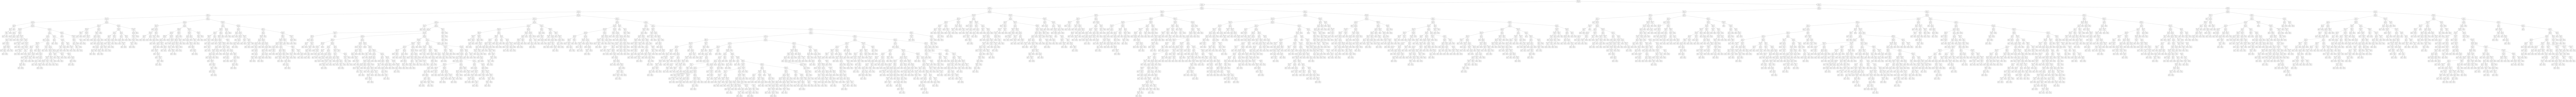

In [1107]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

In [1108]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8954087275255158
0.8973016809200826


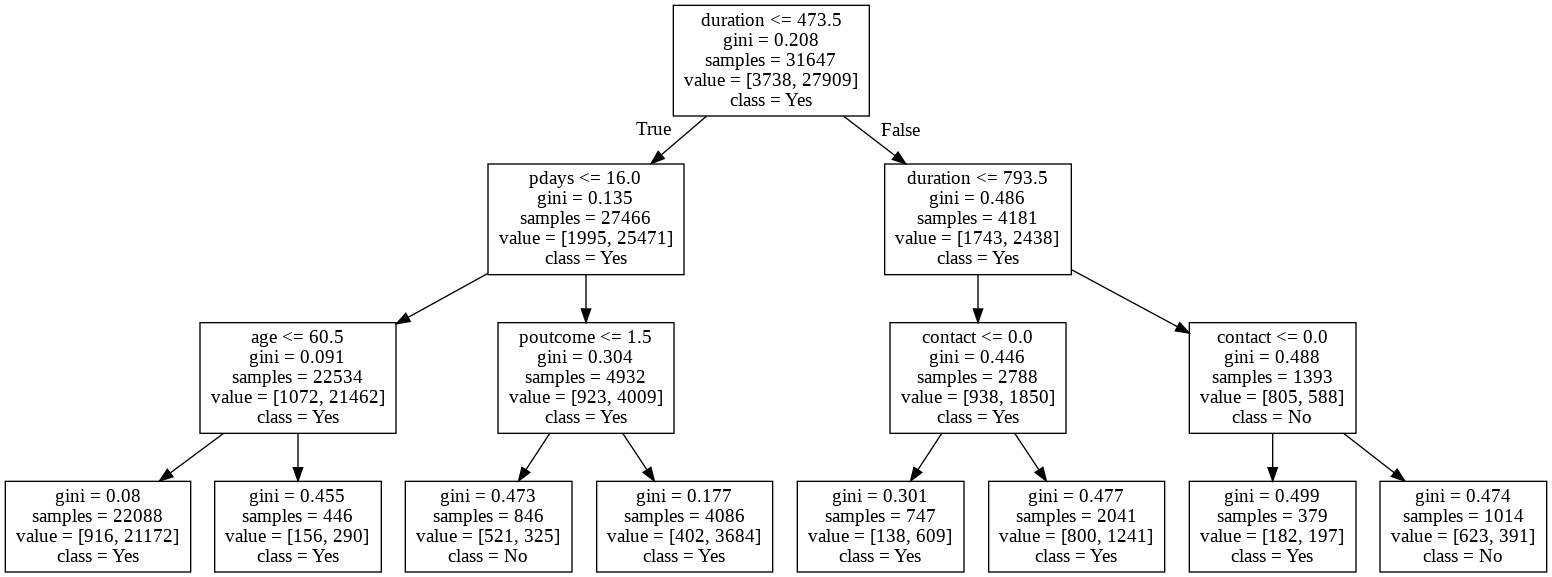

In [1109]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()
retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

0.8973016809200826


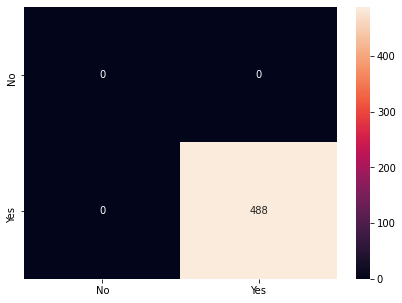

In [1110]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [0]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.9069595989383663


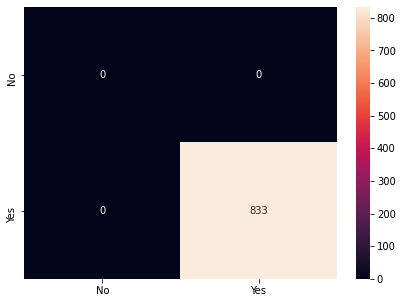

In [1112]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [0]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8849896785608965


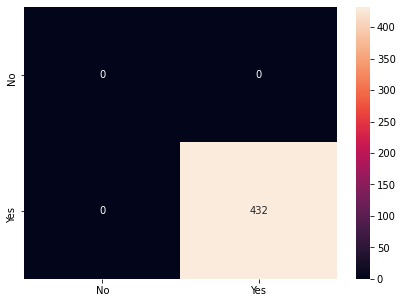

In [1114]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8990710704806841


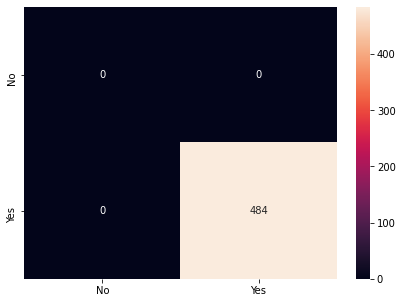

In [1116]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')